kerasを実行するためにtensorflowのバージョンをダウングレード
バージョン変更前にランタイムを再起動する必要がある。(ランタイム→ランタイムを再起動→[1]を実行)

In [32]:
# ライブラリの特定のバージョンへ変更する
!pip install tensorflow==1.14

In [0]:
#IMDbデータセットの読み込み(3-1)
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [34]:
#IMDbの訓練データを確認する
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [35]:
#IMDbのレビュー例を確認する

#word_indexは単語を整数のインデックスにマッピングする辞書
word_index = imdb.get_word_index()

#盛衰のインデックスを単語にマッピング
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#レビューをデコード:インデックスのオフセットとして3が指定されているのは、
#0,1,2がそれぞれ「パディング」、「シーケンスの開始」、「不明」の
#インデックスとして予約されているためであることに注意
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#デコードしたレビューの内容を表示
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
#データの準備(3-2)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):

  #形状が(len(sequences), dimension)の行列を作成し、0で埋める
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    #results[i]のインデックスを1に設定
    results[i,sequence] = 1.
  return results

#訓練データのベクトル化
x_train = vectorize_sequences(train_data)
#テストデータのベクトル化
x_test = vectorize_sequences(test_data)

#ラベルのベクトル化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
#入力値を目的値に写像するネットワークモデルを定義(3-3)
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
#検証用データセットを設定(3-7)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [46]:
#損失関数とオプティマイザを定義(3-8)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 318us/step - loss: 0.5090 - acc: 0.7897 - val_loss: 0.3793 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.3018 - acc: 0.9032 - val_loss: 0.3039 - val_acc: 0.8858
Epoch 3/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.2212 - acc: 0.9272 - val_loss: 0.2772 - val_acc: 0.8899
Epoch 4/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.1780 - acc: 0.9404 - val_loss: 0.2758 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.1424 - acc: 0.9550 - val_loss: 0.3003 - val_acc: 0.8795
Epoch 6/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1186 - acc: 0.9649 - val_loss: 0.2922 - val_acc: 0.8858
Epoch 7/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1003 - acc: 0.9693 - val_loss: 0.3147 -

In [48]:
#Historyオブジェクトのディクショナリの内容を確認する。
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


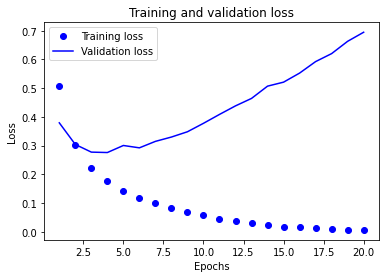

In [54]:
#訓練データと検証データでの損失値をプロットする(3-9)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#"bo"は"blue dot"(青のドット)を意味する
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#"b"は"solid blue line"(青の実線)を意味する
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

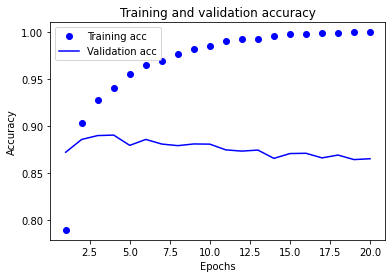

In [60]:
#訓練データと検証データでの正答率をプロット(3-10)
#図を消去
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

上の二つの図より途中からモデルは訓練データセットに対して最適化され、過学習であることが分かる。
そこで、新しいモデルを4エポックで学習し、テストデータで評価する。

In [61]:
#モデルの学習をやり直す(3-11)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す
#https://keras.io/ja/models/model/#evaluate
print(results)

Epoch 1/4
25000/25000 [==============================] - 5s 200us/step - loss: 0.4562 - acc: 0.8135
Epoch 2/4
25000/25000 [==============================] - 3s 131us/step - loss: 0.2623 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 3s 129us/step - loss: 0.2034 - acc: 0.9280
Epoch 4/4
25000/25000 [==============================] - 5s 195us/step
[0.31073374564170836, 0.87616]


In [64]:
#新しいデータで予測値を生成して、確認してみる
print(model.predict(x_test))
print(y_test)

[[0.14515385]
 [0.99842083]
 [0.69981635]
 ...
 [0.10633087]
 [0.04076466]
 [0.55881345]]
[0. 1. 1. ... 0. 0. 0.]
